In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import math
from networkx.drawing.nx_pydot import graphviz_layout

In [8]:
def adj_list_to_graph(adj_list: dict, directed_graph: bool) -> nx.Graph:
  if directed_graph:
    G = nx.DiGraph()
  else:
    G = nx.Graph()
  G.add_nodes_from(list(adj_list.keys()))
  for k, v in adj_list.items():
    for node in v:
      G.add_edge(k, node)
  return G

In [9]:
def adj_mat_to_graph(graph: nx.Graph, adj_mat: np.array) -> nx.Graph:
  labels = list(graph.nodes)
  for row in range(len(adj_mat)):
    for col in range(len(adj_mat[0])):
      # print(adj_mat[row, col])
      if (row == col) or (adj_mat[row, col] == math.inf):
        continue
      graph.add_edge(labels[row], labels[col], weight=adj_mat[row, col])
  return graph

In [10]:
node_list = {
    'c':['a', 'd'],
    'd':['e'],
    'b':['a', 'd'],
    'e':['b'],
    'a':['b']
}

edge_mat = np.array([
    [math.inf, 0.4, math.inf, math.inf, 0.4],
    [math.inf, math.inf, math.inf, 0.6, math.inf],
    [math.inf, 0.2, math.inf, math.inf, 0.1],
    [math.inf, math.inf, 0.6, math.inf, math.inf],
    [math.inf, math.inf, 0.3, math.inf, math.inf]
])

pos1 = {
    "a":(1, 5),
    "b":(4.5, 6.6),
    "c":(3.6, 1.4),
    "d":(5.8, 3.5),
    "e":(7.9, 3.6)
}

pos2 = lambda x: nx.spring_layout(x)
pos3 = lambda x: nx.circular_layout(x)
# pos4 = lambda x: graphviz_layout(x)

In [11]:
def main(direc_graph: bool):
  g = adj_list_to_graph(node_list, direc_graph)
  if direc_graph:
    g = adj_mat_to_graph(g, edge_mat)
  # print(g.edges(data=True))
  pos = pos2(g)
  edge_labels = {(u,v):d['weight'] for u, v, d in g.edges(data=True)}
  nx.draw(g, pos=pos, with_labels=True, node_color="red", node_size=1000, font_color="white", font_size=20, font_weight='bold', width=3, edge_color='lightgray')
  nx.draw_networkx_edge_labels(g, edge_labels=edge_labels, pos=pos, label_pos=0.5, font_color="black")

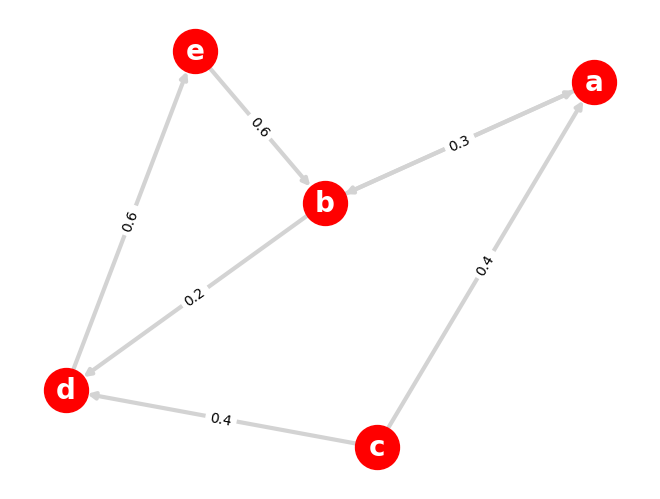

In [12]:
main(True)

In [13]:
def gen_graph(t: str, nodes: int):
  match t:
    case "erd":
      G = nx.erdos_renyi_graph(n=nodes, p=0.3)
    case "wat":
      G = nx.newman_watts_strogatz_graph(n=nodes, k=4, p=0.5)
    case "bara":
      G = nx.barabasi_albert_graph(n=nodes, m=2)
    case "cir":
      offsets = [1, 3]
      G = nx.circulant_graph(n=nodes, offsets=offsets)
    case "lat":
      G = nx.triangular_lattice_graph(m=3, n=3)
    case "barb":
      G = nx.barbell_graph(m1=5, m2=7)
    case "sto":
      sizes = [10, 15, 5]
      probs = [
          [0.8, 0.05, 0.02],
          [0.05, 0.6, 0.05],
          [0.02, 0.05, 0.9]
      ]
      G = nx.stochastic_block_model(sizes=sizes, p=probs)
    case _:
      G = nx.random_regular_graph(d=3, n=nodes)
  nx.draw(G, with_labels=True, node_color='skyblue', node_size=800)
  plt.title(f"{t.upper()} Graph with {nodes} Nodes")
  plt.show()

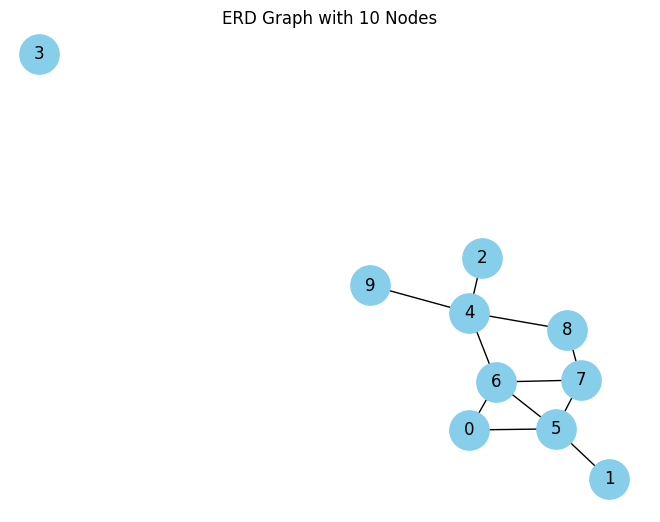

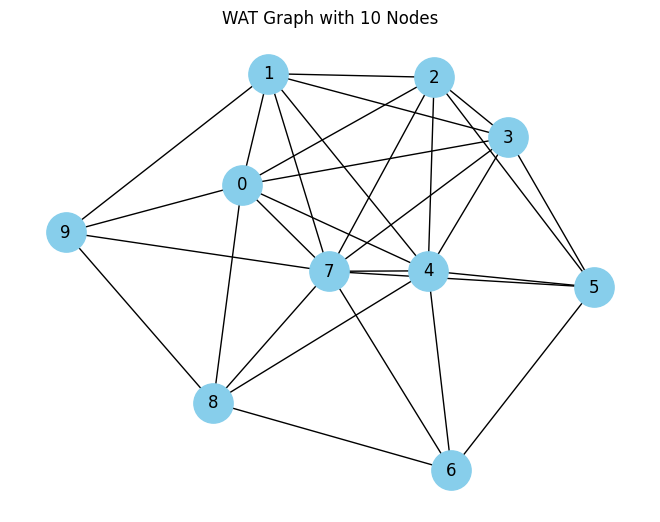

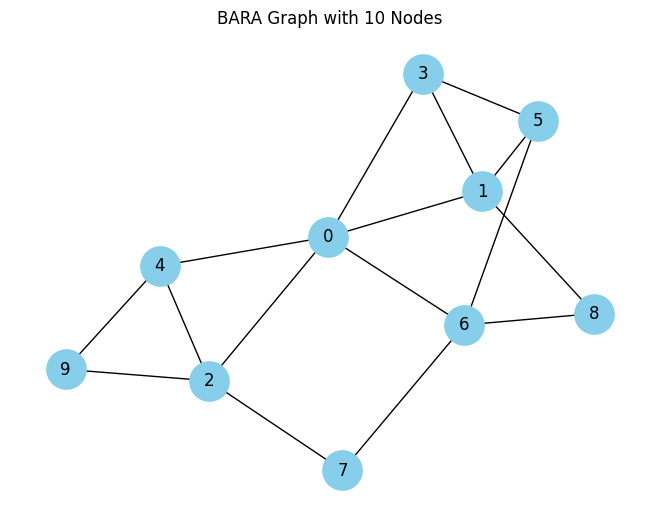

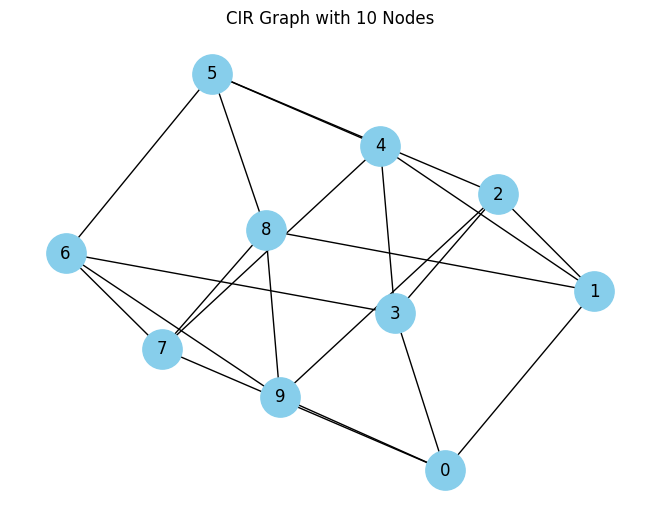

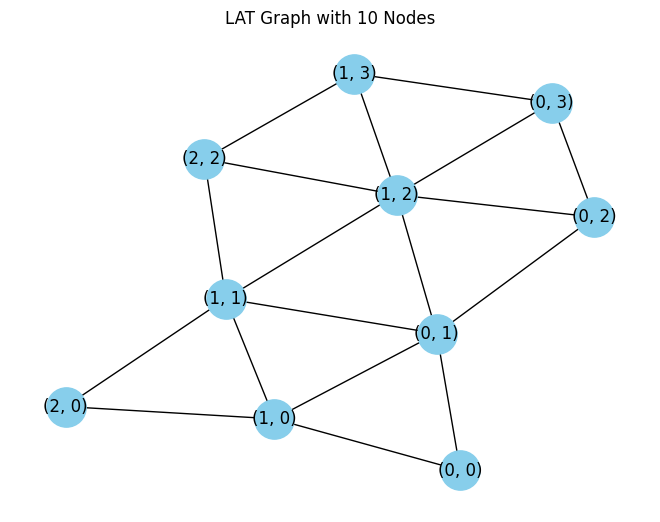

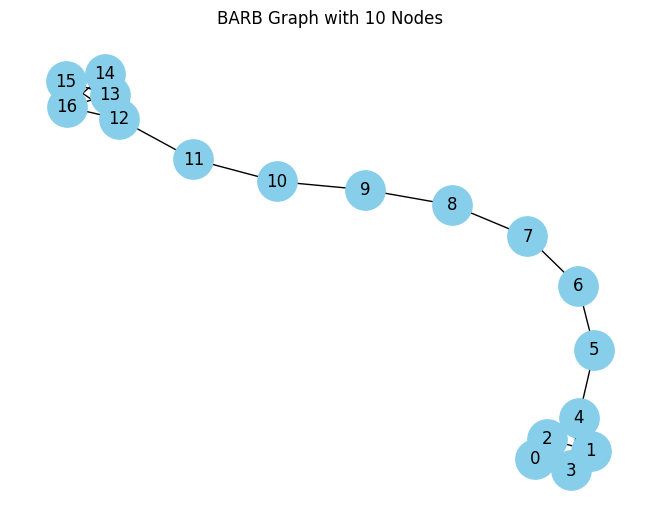

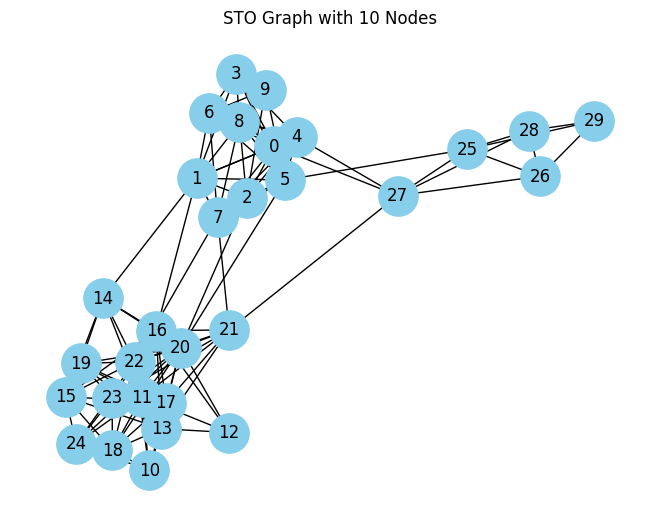

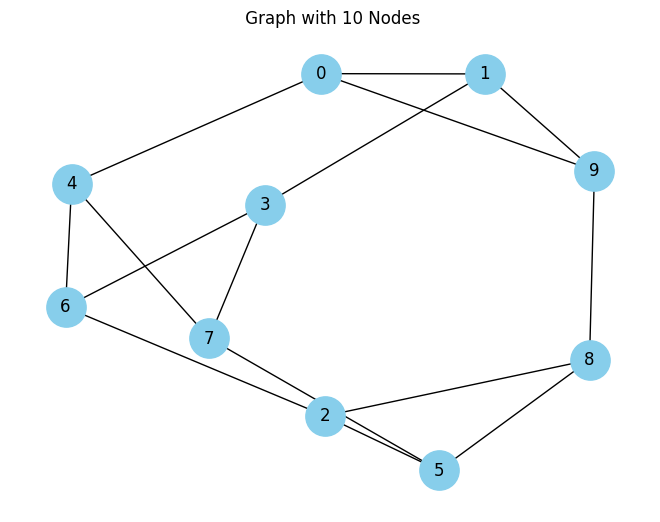

In [14]:
gen_graph(t='erd', nodes=10)
gen_graph(t='wat', nodes=10)
gen_graph(t='bara', nodes=10)
gen_graph(t='cir', nodes=10)
gen_graph(t='lat', nodes=10)
gen_graph(t='barb', nodes=10)
gen_graph(t='sto', nodes=10)
gen_graph(t='', nodes=10)